In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
np.set_printoptions(threshold=np.nan)
import random
from math import pi
import math
import imutils

IMAGE_SIZE = 64

In [5]:
# def rotate_images(X_imgs, start_angle=45, end_angle=-45, n_images=2):
#     X_rotate = []
# #     iterate_at = (end_angle - start_angle) / (n_images - 1)
#     tf.reset_default_graph()
    
#     do = np.random.uniform(end_angle,start_angle,n_images)
#     X = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))
#     radian = tf.placeholder(tf.float32, shape = (len(X_imgs)))
#     tf_img = tf.contrib.image.rotate(X, radian)
    
# #     my_config =tf.ConfigProto(allow_soft_placement=True,log_device_placement=True)
# #     my_config.gpu_options.allow_growth = True

#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
#         for index in range(n_images):
#             degrees_angle = do[index]
#             radian_value = degrees_angle * pi / 180  # Convert to radian
#             radian_arr = [radian_value] * len(X_imgs)
#             rotated_imgs = sess.run(tf_img, feed_dict = {X: X_imgs, radian: radian_arr})
#             X_rotate.extend(rotated_imgs)

#     X_rotate = np.array(X_rotate, dtype = np.float32)
  
#     return X_rotate
def rotate_images(images, start_angle=45, end_angle=-45, n_images=2):
    X_rotate=[]
   
    height = images[0].shape[0]
    width = images[0].shape[1]
    channels = images[0].shape[2]
    num_imgs = images.shape[0]
   
    
    angles= np.random.uniform(end_angle,start_angle,n_images)
    
    for angle in angles:
        for i in range(num_imgs):
            rotated = imutils.rotate(images[i], angle)
            X_rotate.append(rotated)
    
    X_rotate = np.array(X_rotate, dtype = np.float32)
    X_rotate = np.reshape(X_rotate,(n_images*num_imgs,height,width,channels))
#     print(f"shape X_rotate: {X_rotate.shape}")

    return X_rotate


def central_scale_images(X_imgs, scales=np.round(np.random.uniform(0.75,1,3),2)):
    # Various settings needed for Tensorflow operation
    
    boxes = np.zeros((len(scales), 4), dtype = np.float32)
    for index, scale in enumerate(scales):
        x1 = y1 = 0.5 - 0.5 * scale # To scale centrally
        x2 = y2 = 0.5 + 0.5 * scale
        boxes[index] = np.array([y1, x1, y2, x2], dtype = np.float32)
    box_ind = np.zeros((len(scales)), dtype = np.int32)
    crop_size = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    
    X_scale_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE,1))
    # Define Tensorflow operation for all scales but only one base image at a time
    tf_img = tf.image.crop_and_resize(X, boxes, box_ind, crop_size)
    
    
    my_config =tf.ConfigProto(allow_soft_placement=True,log_device_placement=True)
    my_config.gpu_options.allow_growth = True
    sess = tf.Session(config=my_config)

    sess.run(tf.global_variables_initializer())

    for img_data in X_imgs:
        batch_img = np.expand_dims(img_data, axis = 0)
        scaled_imgs = sess.run(tf_img, feed_dict = {X: batch_img})
        X_scale_data.extend(scaled_imgs)
    
    X_scale_data = np.array(X_scale_data, dtype = np.float32)
    sess.close()
    return X_scale_data
def generate_data(X_imgs):
    
    rotated_imgs = rotate_images(X_imgs)
 
    rotated_imgs= np.concatenate((X_imgs,rotated_imgs),axis=0)
    print(f"rotated_imgs shape: {rotated_imgs.shape}")
    scaled_imgs =central_scale_images(rotated_imgs)
    
    print(f"scaled_img shape: {scaled_imgs.shape}")
    result = np.concatenate((rotated_imgs,scaled_imgs),axis=0)
    print(f"result shape: {result.shape}")
    return result
    

In [6]:
# ## test rotate using opencv
# p5=r"D:\Hoang\girl.jpg"
# i1 = cv2.imread(p5)
# i1=np.multiply(i1,1.0/255.0)
# print(i1.shape)
# i1=np.reshape(i1,(-1,i1.shape[0],i1.shape[1],i1.shape[2]))
# print(i1.shape)
# x= rotate_images(i1)
# # x = np.multiply(x,1.0/255.0)
# num_imgs = x.shape[0]
# print(num_imgs)
# num_girds = math.ceil(math.sqrt(num_imgs))
# fig,axes = plt.subplots(num_girds,num_girds)

# for i, ax in enumerate(axes.flat):
#     if i<num_imgs:
#         ax.imshow(cv2.cvtColor(x[i],cv2.COLOR_BGR2RGB))
#         ax.set_yticklabels([])
#         ax.set_xticklabels([])

(1, 64, 64, 1)
rotated_imgs shape: (3, 64, 64, 1)
scaled_img shape: (9, 64, 64, 1)
result shape: (12, 64, 64, 1)
generated_data shape: (12, 64, 64, 1)
num_imgs: 12


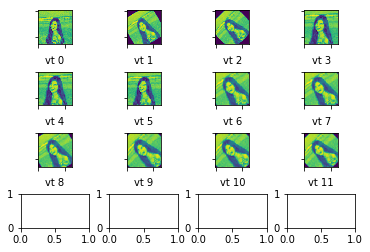

In [7]:
# Start rotation at -90 degrees, end at 90 degrees and produce totally 14 images
p1=r"D:\DatasetJapanese\data_use_kl\a_k\00001.png"
p2 = r"image\testGenerate.jpeg"


i1 = cv2.imread(p2,0)

# i2= cv2.imread(p3)
i1=cv2.resize(i1,(64,64))
i1=np.reshape(i1,(64,64,1))
i1= np.multiply(i1,1.0/255.0)

# i2=cv2.resize(i2,(64,64))
# i2= np.multiply(i2,1.0/255.0)

# plt.imshow(i1)
# plt.show()

x=np.asarray([i1])
print(x.shape)
# cv2.imshow("img",i1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# print(f"shape x: {x.shape}")
# rotated_imgs = rotate_images(x, 45, -45, 3)
# print(f"shape of rotated_imgs: {rotated_imgs.shape}")

# scaled_imgs = central_scale_images(rotated_imgs,scales=[0.8,0.7])
# print(f"scaled imgs shape: {scaled_imgs.shape}")


generated_data = generate_data(x)


print(f"generated_data shape: {generated_data.shape}")
num_imgs = generated_data.shape[0]
print(f"num_imgs: {num_imgs}")
num_grids = math.ceil(math.sqrt(num_imgs))

fig, axes = plt.subplots(num_grids,num_grids)
fig.subplots_adjust(hspace=0.8, wspace=0.3)
do = 140/15

for i, ax in enumerate(axes.flat):
    if i<num_imgs:
#         ax.imshow(rotated_imgs[i])
        ax.imshow(generated_data[i].reshape(64,64))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        ax.set_xlabel(f"vt {i}")

plt.show()


In [8]:
# a=np.arange(1,10).reshape(3,3,1)
# print(a)

In [ ]:
# a=np.arange(0,18).reshape(3,3,2)
# b=np.arange(-18,0).reshape(3,3,2)

# c=np.concatenate((a,b),axis=2)
# print(c.shape)
# print(c)

In [ ]:
# np.random.uniform(-45,45,3)
# p2 = r"image\testGenerate.jpeg"
# img = cv2.imread(p2,0);
# img= cv2.resize(img,(64,64))
# print(img.shape)